# Set Up Your Notebook and Import Libraries

In [1]:
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from collections import Counter

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Optional: Set Seaborn style
sns.set(style="whitegrid")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\carol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\carol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\carol\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# 3. Load the data

In [2]:
with open(r"C:\Users\carol\Documents\Data Specialization\20th_century\20th_century_Wiki.txt", "r",errors='ignore') as file:
    data = file.read().replace('\n', ' ')

# 4. Tokenize the Words and Create Initial Plot of 10 Most Common Words

In [3]:
import nltk
nltk.download('punkt_tab')

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent) 

['    Key events of the 20th century - Wikipedia                            Jump to content        Main menu      Main menu move to sidebar hide    \t\tNavigation \t   Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us      \t\tContribute \t   HelpLearn to editCommunity portalRecent changesUpload file                    Search            Search                Donate         Appearance                 Create account  Log in         Personal tools       Create account Log in      \t\tPages for logged out editors learn more    ContributionsTalk                             Contents move to sidebar hide     (Top)      1 Historic events in the 20th century     Toggle Historic events in the 20th century subsection      1.1 World at the beginning of the century       1.1.1 "The war to end all wars": World War I (1914â€“1918)         1.1.2 Russian Revolution and communism           1.2 Between the wars       1.2.1 Economic depression         1.2.2 The rise of dictatorship   

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\carol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [4]:
# Tokenize the text into single words

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word)

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'Wikipedia', 'Jump', 'to', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'to', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Search', 'Search', 'Donate', 'Appearance', 'Create', 'account', 'Log', 'in', 'Personal', 'tools', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'more', 'ContributionsTalk', 'Contents', 'move', 'to', 'sidebar', 'hide', '(', 'Top', ')', '1', 'Historic', 'events', 'in', 'the', '20th', 'century', 'Toggle', 'Historic', 'events', 'in', 'the', '20th', 'century', 'subsection', '1.1', 'World', 'at', 'the', 'beginning', 'of', 'the', 'century', '1.1.1', '``', 'The', 'war', 'to', 'end', 'all', 'wars', "''", ':', 'World', 'War', 'I', '(', '1914â€', '“', '1918', ')', '1.1.2', 'Russian', 'Revolution', 'and', 'comm

In [5]:
# Analise words frequency distribution

from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print (dist_words)

<FreqDist with 4813 samples and 21816 outcomes>


In [6]:
#Review the most common (10) words
dist_words.most_common(10)

[('.', 1569),
 ('the', 1095),
 (',', 965),
 ('of', 603),
 ('and', 398),
 ('The', 327),
 ('to', 326),
 ('[', 302),
 (']', 302),
 ('in', 291)]

In [7]:
common_words = dist_words.most_common(10)
words = [word for word, count in common_words]
counts = [count for word, count in common_words]

C:\Users\carol\AppData\Local\Temp\ipykernel_25292\217221460.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette="viridis")


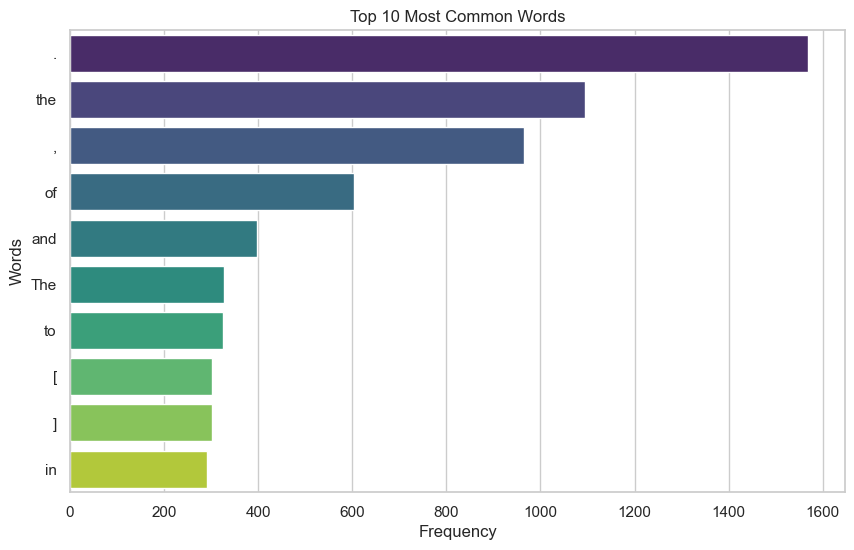

In [8]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=words, palette="viridis")
plt.title("Top 10 Most Common Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

# Remove stop words

In [9]:
# Defining stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'for', "you'll", 'has', 'own', 'just', 'ain', 'wasn', 'she', "aren't", 'until', "isn't", 'myself', 'mightn', 'any', 'ourselves', 'am', 'aren', 'isn', 'he', 'a', 'into', 'won', 'hadn', 'mustn', 'through', 'yourselves', 'no', 't', 'yours', 'herself', 'their', 'themselves', 'during', 'yourself', 'once', 'hasn', 'it', 'be', 'is', 'up', 'who', 'in', "mustn't", 'other', 'at', "hadn't", 'over', 'will', 'then', 'about', "didn't", 'all', 'what', 'y', 'were', 'himself', 'only', 'should', "don't", 'few', 'his', 'nor', "won't", 'or', 'can', 'are', 'that', 'when', 'with', 'and', "that'll", 'same', 'its', "doesn't", 'before', 'again', 'have', 'why', 'the', 'there', 'off', 'o', 've', 'had', "mightn't", 'shouldn', 'didn', 'll', 'm', 'you', 'not', "haven't", 'most', 'itself', "couldn't", 'while', "shouldn't", 'whom', 'does', 'where', 'our', 'these', 'her', 'we', 'those', 'him', 'than', 'being', 'how', 'theirs', 'haven', 'below', 'both', 'weren', 'too', "wouldn't", 'i', 'them', 'which', 'my', 'after', 

In [10]:
filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [11]:
# Create a new FreqDist for filtered_words

dist_words_filter = FreqDist(stop_words)
print(dist_words_filter)

<FreqDist with 179 samples and 179 outcomes>


In [12]:
filtered_common_words = dist_words_filter.most_common(10)
words = [word for word, count in filtered_common_words]
counts = [count for word, count in filtered_common_words]

C:\Users\carol\AppData\Local\Temp\ipykernel_25292\2169724600.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette="viridis")


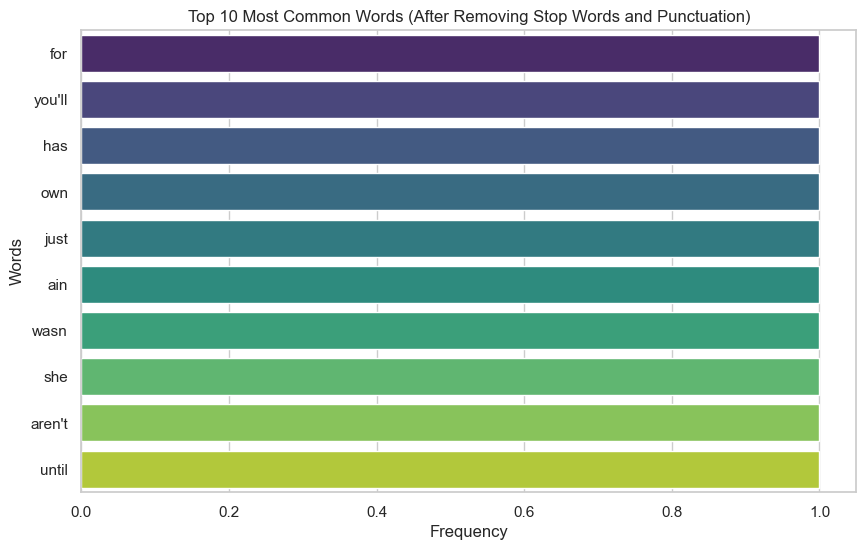

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=words, palette="viridis")
plt.title("Top 10 Most Common Words (After Removing Stop Words and Punctuation)")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

NOTE: the most common strings in the text sample are mainly punctuation marks (as well as “Alice” and “said”)

In [14]:
# Substitute all punctuation marks with a space

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_words))

In [15]:
#Checking data

sans_punc

'  Key    events      th    century         Wikipedia    Jump    content    Main    menu    Main    menu    move    sidebar    hide    Navigation    Main    pageContentsCurrent    eventsRandom    articleAbout    WikipediaContact    us    Contribute    HelpLearn    editCommunity    portalRecent    changesUpload    file    Search    Search    Donate    Appearance    Create    account    Log    Personal    tools    Create    account    Log    Pages    logged    editors    learn    ContributionsTalk    Contents    move    sidebar    hide         Top              Historic    events      th    century    Toggle    Historic    events      th    century    subsection           World    beginning    century                   The    war    end    wars               World    War    I                                              Russian    Revolution    communism           Between    wars             Economic    depression             The    rise    dictatorship           Global    war         Wor

In [16]:
#create another tokenized object 

tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['Key', 'events', 'th', 'century', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Search', 'Search', 'Donate', 'Appearance', 'Create', 'account', 'Log', 'Personal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'ContributionsTalk', 'Contents', 'move', 'sidebar', 'hide', 'Top', 'Historic', 'events', 'th', 'century', 'Toggle', 'Historic', 'events', 'th', 'century', 'subsection', 'World', 'beginning', 'century', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'Russian', 'Revolution', 'communism', 'Between', 'wars', 'Economic', 'depression', 'The', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'The', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'd

In [17]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2)

In [18]:
# Get the 19 most common words after further processing
filtered_common_words = dist_words_filter_2.most_common(19)
words = [word for word, count in filtered_common_words]
counts = [count for word, count in filtered_common_words]


C:\Users\carol\AppData\Local\Temp\ipykernel_25292\2748067874.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette="viridis")


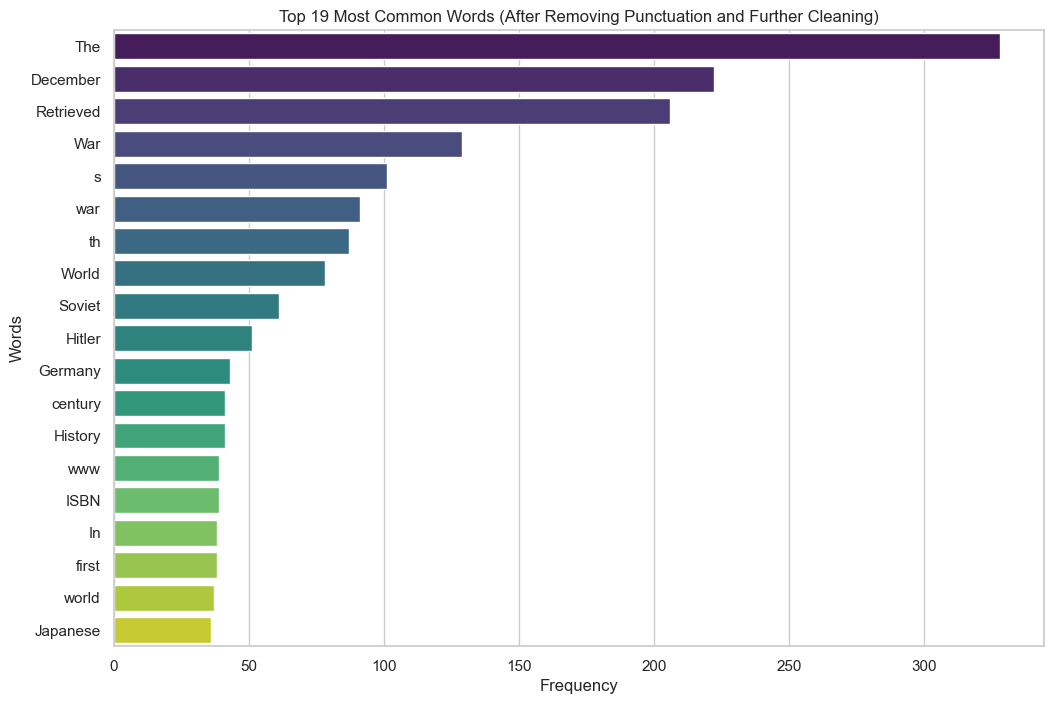

In [19]:
# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=counts, y=words, palette="viridis")
plt.title("Top 19 Most Common Words (After Removing Punctuation and Further Cleaning)")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

# 6. Create a tags list using TextBlob.

In [20]:
new_stopwords = ["And", "Then", 'n', 't', 's', 'The']

In [21]:
filtered = []
for word in tokenized_word_2:
    if word not in new_stopwords:
        filtered.append(word)

In [22]:
%%time 
text = TextBlob(str(filtered))

CPU times: total: 0 ns
Wall time: 0 ns


In [23]:
#Check object text
text

TextBlob("['Key', 'events', 'th', 'century', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Search', 'Search', 'Donate', 'Appearance', 'Create', 'account', 'Log', 'Personal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'ContributionsTalk', 'Contents', 'move', 'sidebar', 'hide', 'Top', 'Historic', 'events', 'th', 'century', 'Toggle', 'Historic', 'events', 'th', 'century', 'subsection', 'World', 'beginning', 'century', 'war', 'end', 'wars', 'World', 'War', 'I', 'Russian', 'Revolution', 'communism', 'Between', 'wars', 'Economic', 'depression', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'war'

In [24]:
# Create a tag list ( describe whether a word is a noun , adjective, verb...)
import nltk
nltk.download('averaged_perceptron_tagger_eng')
tags_list = text.tags

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\carol\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [25]:
#Check object tag_list
tags_list

[('[', 'JJ'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'th", 'NNP'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'Wikipedia", 'NNP'),
 ("'", 'POS'),
 ("'Jump", 'NNP'),
 ("'", 'POS'),
 ("'content", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'move", 'NNP'),
 ("'", 'POS'),
 ("'sidebar", 'NNP'),
 ("'", 'POS'),
 ("'hide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP'),
 ("'", 'POS'),
 ("'us", 'NNP'),
 ("'", 'POS'),
 ("'HelpLearn", 'NNP'),
 ("'", 'POS'),
 ("'editCommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalRecent", 'NNP'),
 ("'", 'POS'),
 ("'file", 'IN'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Donate", 'NNP'),
 ("'", 'POS'),
 ("'Appearance", 'NN'),
 ("'Create", 'NNP'),
 ("'", 'POS'),
 ("'account", 'NNP'),
 ("'", 'POS'),

In [26]:
#Create a Dataframe from tag_list

df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]

In [27]:
df_text.head()

,Words,Word type
0,[,JJ
1,'Key,NNP
2,',POS
3,'events,NNS
4,',POS


In [28]:
df_t = df_text.groupby('Word type').count().reset_index()

In [29]:
df_t.head()

,Word type,Words
0,CC,1
1,CD,75
2,DT,13
3,EX,12
4,FW,43


In [30]:
top20 = df_t.nlargest(20, 'Words')

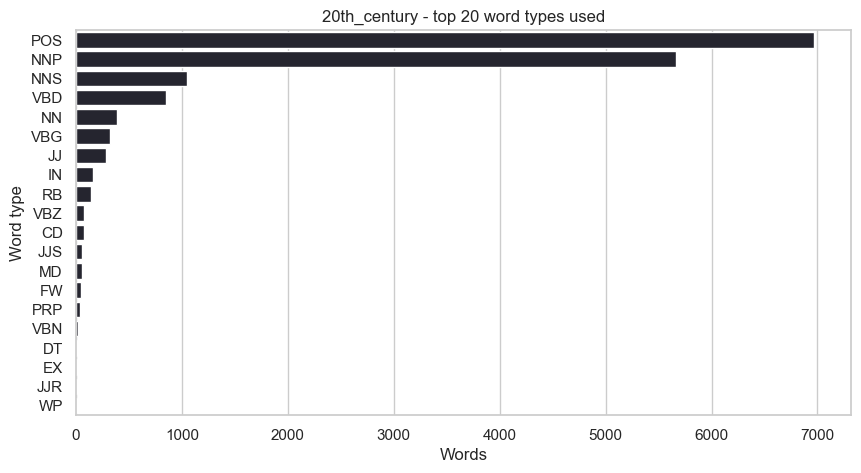

In [31]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 20):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top20).set_title("20th_century - top 20 word types used")

NOTE: It’s clear from the results that possessive endings (a grammatical construct used to indicate possession or ownership), proper nouns (specific names given to particular individuals, places, organizations, or events), and verbs are the top three word groups used in the novel, followed closely by pluralized nouns.

# 9 NOUNS

In [32]:
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')

In [33]:
#  Check top15 nouns

top15

,Word,Occurences
292,'December,222
1259,'War,129
2578,'war,91
2498,'th,87
1306,'World,78
1106,'Soviet,61
537,'Hitler,51
1495,'century,41
536,'History,41
2611,'www,39


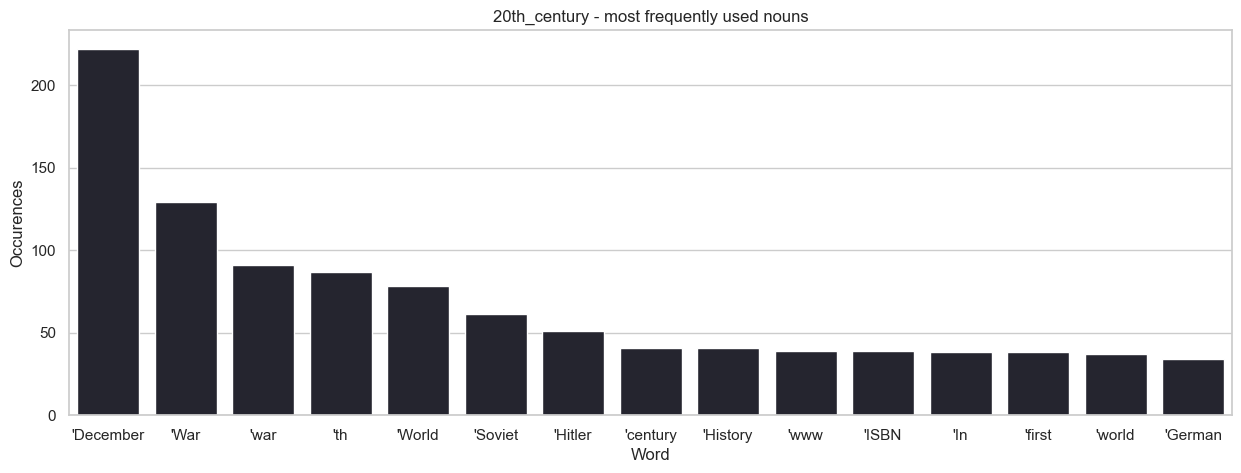

In [34]:
#Create a bar plot to visualize results. 

plt.figure(figsize=(15, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data = top15).set_title("20th_century - most frequently used nouns")

# 9. Verbs

In [35]:
df = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')

In [36]:
#Check top15 data

top15

,Word,Occurences
26,'Retrieved,206
35,'United,30
0,'Allied,19
195,'led,15
315,'used,13
193,'launched,12
1,'Archived,10
92,'controlled,9
160,'forced,8
307,'turned,7


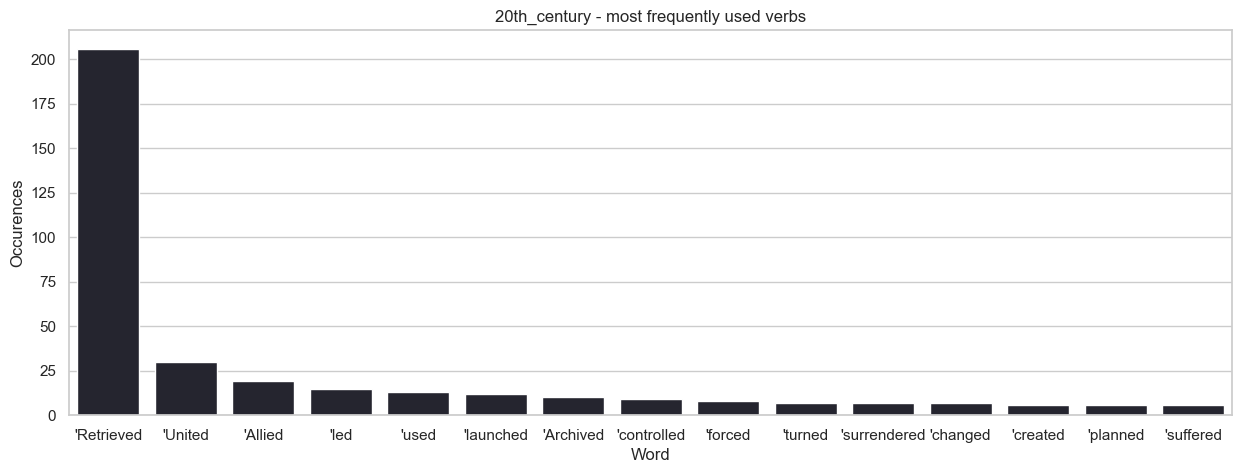

In [37]:
plt.figure(figsize = (15, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x = "Word", y = "Occurences",
    saturation = 0.9, data = top15).set_title("20th_century - most frequently used verbs")

# 9. Adjectives

In [38]:
df = df_text[df_text['Word type'] == "JJ"]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top15= y.nlargest(15, 'Occurences')

In [39]:
#Check data

top15

,Word,Occurences
28,'Japanese,36
2,'American,24
5,'Atlantic,13
20,'Guardian,10
14,'Chinese,7
43,'Russian,6
1,'African,6
104,'political,6
105,'possible,5
7,'Baltic,5


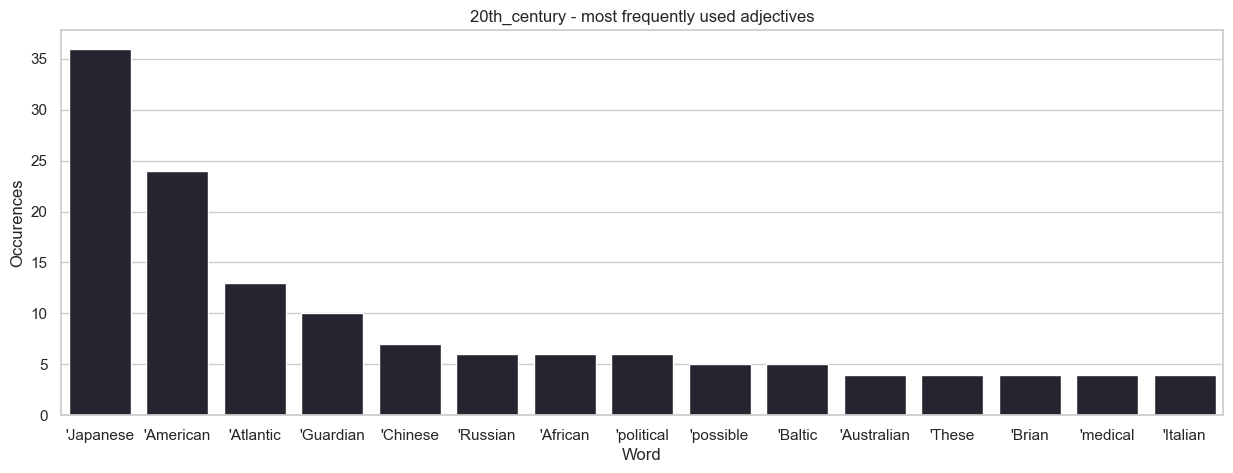

In [40]:
plt.figure(figsize=(15, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data=top15).set_title("20th_century - most frequently used adjectives")

NOTE: 
Nouns: The most frequently used nouns, such as "Japanese," "American," and "Atlantic," suggest that the text places a significant emphasis on nationalities, locations, or geographic references. This might indicate a historical, political, or geographical focus within the text, as these terms are often used to discuss events, nations, and their roles in global developments.

Verbs: The dominance of verbs like "Retrieved" and "United" points towards actions or states commonly associated with historical or political activities. "Retrieved" might indicate references to archived or sourced materials, possibly suggesting the text includes many citations or references to documents. Additionally, terms like "led," "used," and "controlled" imply narratives around leadership, influence, and governance.

Adjectives: The frequent adjectives such as "Japanese," "American," and "Atlantic" mirror the emphasis found in the nouns. These adjectives likely describe entities or events of significance, reinforcing the thematic focus on nationalities and geopolitical elements.

# 10. Create a dataframe with the countries and the number of times they’re mentioned in your text

In [41]:
# Load country data
with open(r"C:\Users\carol\Documents\Data Specialization\20th_century\country_list2.txt", "r",errors='ignore') as file:
    country_list = file.read().splitlines()


In [42]:
country_list

['ï»¿Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Democratic Republic of the',
 'Congo, Republic of the',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Hondur

In [43]:
# Step 2: Count country mentions in the text
from collections import Counter

In [44]:
# Convert the tokenized words to lowercase for matching
tokenized_words_lower = [word.lower() for word in tokenized_word]  # Use your existing tokenized words list
country_mentions = Counter()

for country in country_list:
    count = tokenized_words_lower.count(country.lower())
    if count > 0:
        country_mentions[country] = count


In [45]:
# Step 3: Create DataFrame
import pandas as pd

df_countries = pd.DataFrame(country_mentions.items(), columns=['Country', 'Mentions'])
df_countries = df_countries.sort_values(by='Mentions', ascending=False)


C:\Users\carol\AppData\Local\Temp\ipykernel_25292\3967518929.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_countries.head(50), x='Mentions', y='Country', palette='dark')


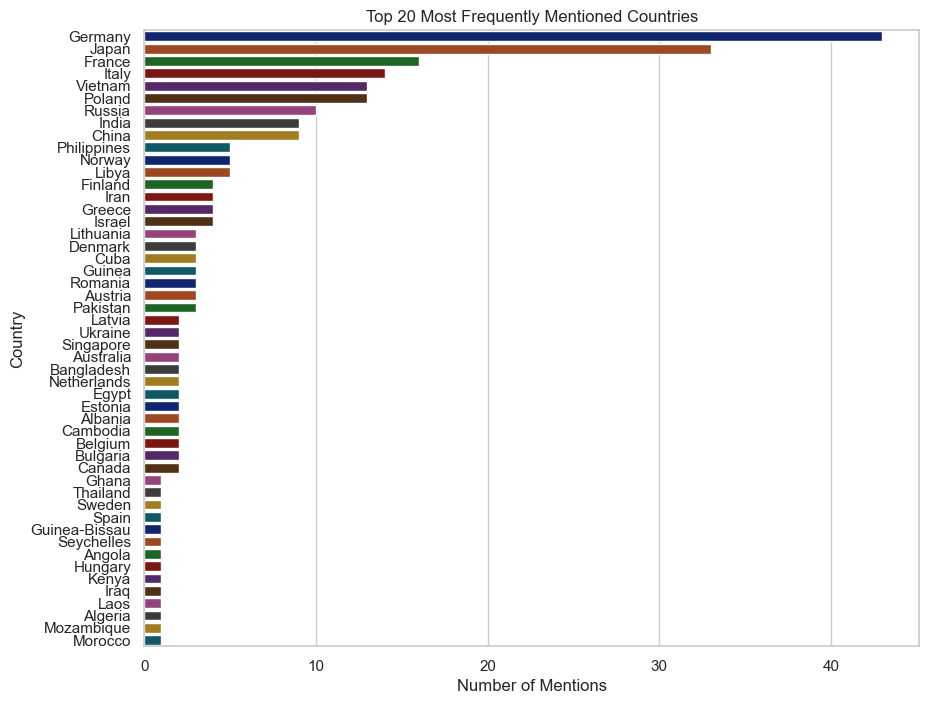

In [46]:
# Step 4: Plot the frequency of country mentions
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(data=df_countries.head(50), x='Mentions', y='Country', palette='dark')
plt.title('Top 20 Most Frequently Mentioned Countries')
plt.xlabel('Number of Mentions')
plt.ylabel('Country')
plt.show()

In [47]:
# Display the DataFrame for verification
df_countries.head(20)

,Country,Mentions
18,Germany,43
30,Japan,33
17,France,16
29,Italy,14
55,Vietnam,13
46,Poland,13
48,Russia,10
24,India,9
11,China,9
45,Philippines,5


NOTE: Here's a summary of the observations:

Germany and Japan are the most mentioned countries, with significantly higher mentions compared to others, likely due to their prominent roles in major events like the World Wars and post-war global dynamics.

France and Italy follow closely, reflecting their involvement in both World Wars and colonial activities.

Vietnam appears frequently as well, likely due to the Vietnam War, a defining event in the latter half of the 20th century.

Poland, Russia, and India have moderate mentions, which may be attributed to Poland’s role in WWII, Russia’s influence in global politics as part of the Soviet Union, and India’s post-colonial developments.

Countries like China, the Philippines, and Norway also have notable mentions, perhaps due to significant political and social events involving them during the century.